# Dataset

In [ ]:
! chmod 600 kaggle.json
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 99% 657M/663M [00:15<00:00, 38.7MB/s]
100% 663M/663M [00:16<00:00, 43.5MB/s]


In [ ]:
import zipfile
local_zip = '/content/tuberculosis-tb-chest-xray-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
# remove images normal
import os, random
path = '/content/TB_Chest_Radiography_Database/Normal'# You can provide the path here
n = 2800 # Number of random images to be removed
img_names = os.listdir(path)  # Get image names in folder
img_names = random.sample(img_names, n)  # Pick 2800 random images
for image in img_names:  # Go over each image name to be deleted
  f = os.path.join(path, image)  # Create valid path to image
  os.remove(f)  # Remove the image

In [ ]:
images_tb = '/content/TB_Chest_Radiography_Database/Tuberculosis/'
images_normal = '/content/TB_Chest_Radiography_Database/Normal/'

In [ ]:
import numpy as np
import pandas as pd
import cv2,os, random
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
from tqdm.notebook import tqdm
clahe=cv2.createCLAHE(clipLimit=2, tileGridSize=(16,16))
for ind, i in tqdm(enumerate(os.listdir(images_tb))):
    img = cv2.imread(images_tb+i)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    
    img_eqhist = cv2.equalizeHist(gray_img)
    
    cv2.imwrite(images_tb+i, img_eqhist)

0it [00:00, ?it/s]

In [ ]:
for ind, i in tqdm(enumerate(os.listdir(images_normal))):
    img = cv2.imread(images_normal+i)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    
    img_eqhist = cv2.equalizeHist(gray_img)

    cv2.imwrite(images_normal+i, img_eqhist)

0it [00:00, ?it/s]

/content/TB_Chest_Radiography_Database/Tuberculosis/ 720 ['Tuberculosis-219.png', 'Tuberculosis-684.png', 'Tuberculosis-621.png', 'Tuberculosis-172.png', 'Tuberculosis-298.png', 'Tuberculosis-334.png', 'Tuberculosis-102.png', 'Tuberculosis-150.png']


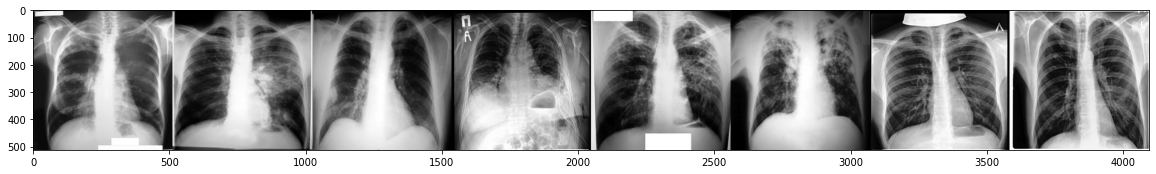

/content/TB_Chest_Radiography_Database/Normal/ 700 ['Normal-1791.png', 'Normal-2389.png', 'Normal-1329.png', 'Normal-1034.png', 'Normal-3443.png', 'Normal-1373.png', 'Normal-1273.png', 'Normal-1365.png']


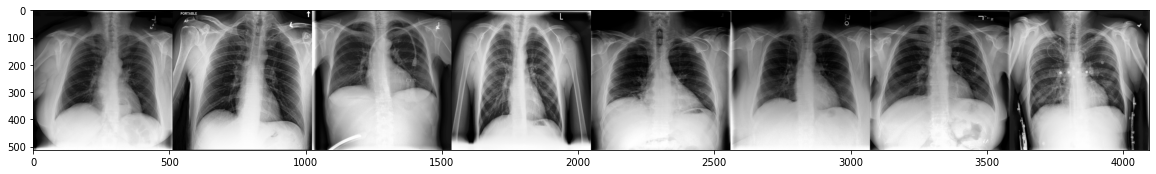

In [ ]:
for i in [images_tb, images_normal]:
    print(i, len(os.listdir(i)),os.listdir(i)[:8])
    img = cv2.imread(i+'/'+os.listdir(i)[0])
    img1 = cv2.imread(i+'/'+os.listdir(i)[1])
    img2 = cv2.imread(i+'/'+os.listdir(i)[2])
    img3 = cv2.imread(i+'/'+os.listdir(i)[3])
    img4 = cv2.imread(i+'/'+os.listdir(i)[4])
    img5 = cv2.imread(i+'/'+os.listdir(i)[5])
    img6 = cv2.imread(i+'/'+os.listdir(i)[6])
    img7 = cv2.imread(i+'/'+os.listdir(i)[7])
    plt.figure(figsize=(20,20))
    plt.imshow(np.hstack([img, img1, img2, img3, img4, img5, img6, img7]))
    plt.show()

# Split Data and Augmentation Data

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/TB_Chest_Radiography_Database", output="/content/output", seed=1337, ratio=(.7, .2, .1), group_prefix=None) # default values

Copying files: 1400 files [00:00, 3058.61 files/s]


In [ ]:
import os
categories=os.listdir('/content/output/train')
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)

{'Tuberculosis': 0, 'Normal': 1}


In [ ]:
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
#Define Directories for train, test & Validation Set
train_path = '/content/output/train'
test_path = '/content/output/test'
valid_path = '/content/output/val'
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 500x500 
img_height = 224
img_width = 224

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 978 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


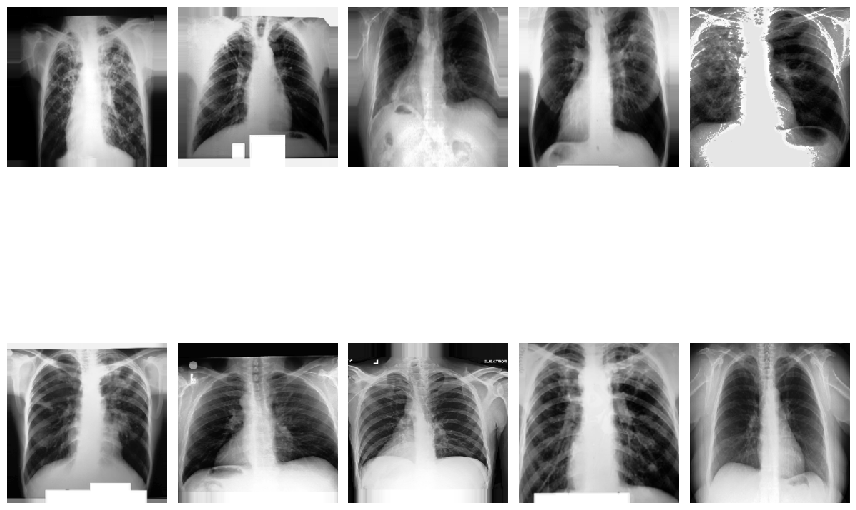

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = label_dict 
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),interpolation='nearest')
        break
plt.tight_layout()
plt.show()

# Training Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf

model = Sequential()
model.add(tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False, weights="imagenet", input_shape=(224, 224, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.layers[0].trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_1 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                      

In [ ]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1, factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.0, 1: 1.0}


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(train, epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25
62/62 [==============================] - 31s 256ms/step - loss: 0.3533 - accuracy: 0.8810 - val_loss: 0.9981 - val_accuracy: 0.7641 - lr: 0.0100
Epoch 2/25
62/62 [==============================] - 15s 242ms/step - loss: 0.2126 - accuracy: 0.9325 - val_loss: 0.9540 - val_accuracy: 0.7958 - lr: 0.0100
Epoch 3/25
62/62 [==============================] - 16s 253ms/step - loss: 0.1947 - accuracy: 0.9425 - val_loss: 1.2089 - val_accuracy: 0.7606 - lr: 0.0100
Epoch 4/25
62/62 [==============================] - ETA: 0s - loss: 0.1582 - accuracy: 0.9536
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
62/62 [==============================] - 15s 247ms/step - loss: 0.1582 - accuracy: 0.9536 - val_loss: 1.0191 - val_accuracy: 0.7641 - lr: 0.0100
Epoch 5/25
62/62 [==============================] - 15s 249ms/step - loss: 0.1245 - accuracy: 0.9597 - val_loss: 0.6108 - val_accuracy: 0.8134 - lr: 0.0030
Epoch 6/25
62/62 [==============================] - 15s 246ms

# Evaluation Model

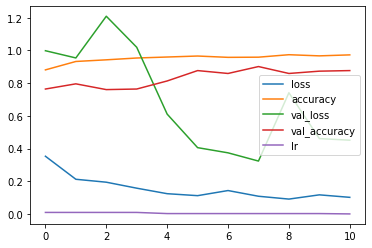

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
test_accu = model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

9/9 [==============================] - 1s 84ms/step - loss: 0.4377 - accuracy: 0.8611
The testing accuracy is : 86.11111044883728 %


In [ ]:
preds = model.predict(test,verbose=1)

9/9 [==============================] - 1s 85ms/step


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

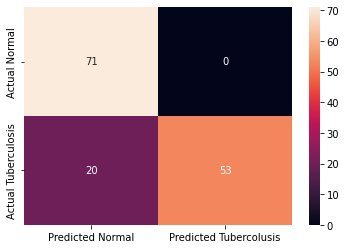

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Tuberculosis"],
columns=["Predicted Normal", "Predicted Tubercolusis"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['Normal','Tuberculosis']))

              precision    recall  f1-score   support

      Normal       0.78      1.00      0.88        71
Tuberculosis       1.00      0.73      0.84        73

    accuracy                           0.86       144
   macro avg       0.89      0.86      0.86       144
weighted avg       0.89      0.86      0.86       144



# Testing Model

(144, 224, 224, 3)
(144,)


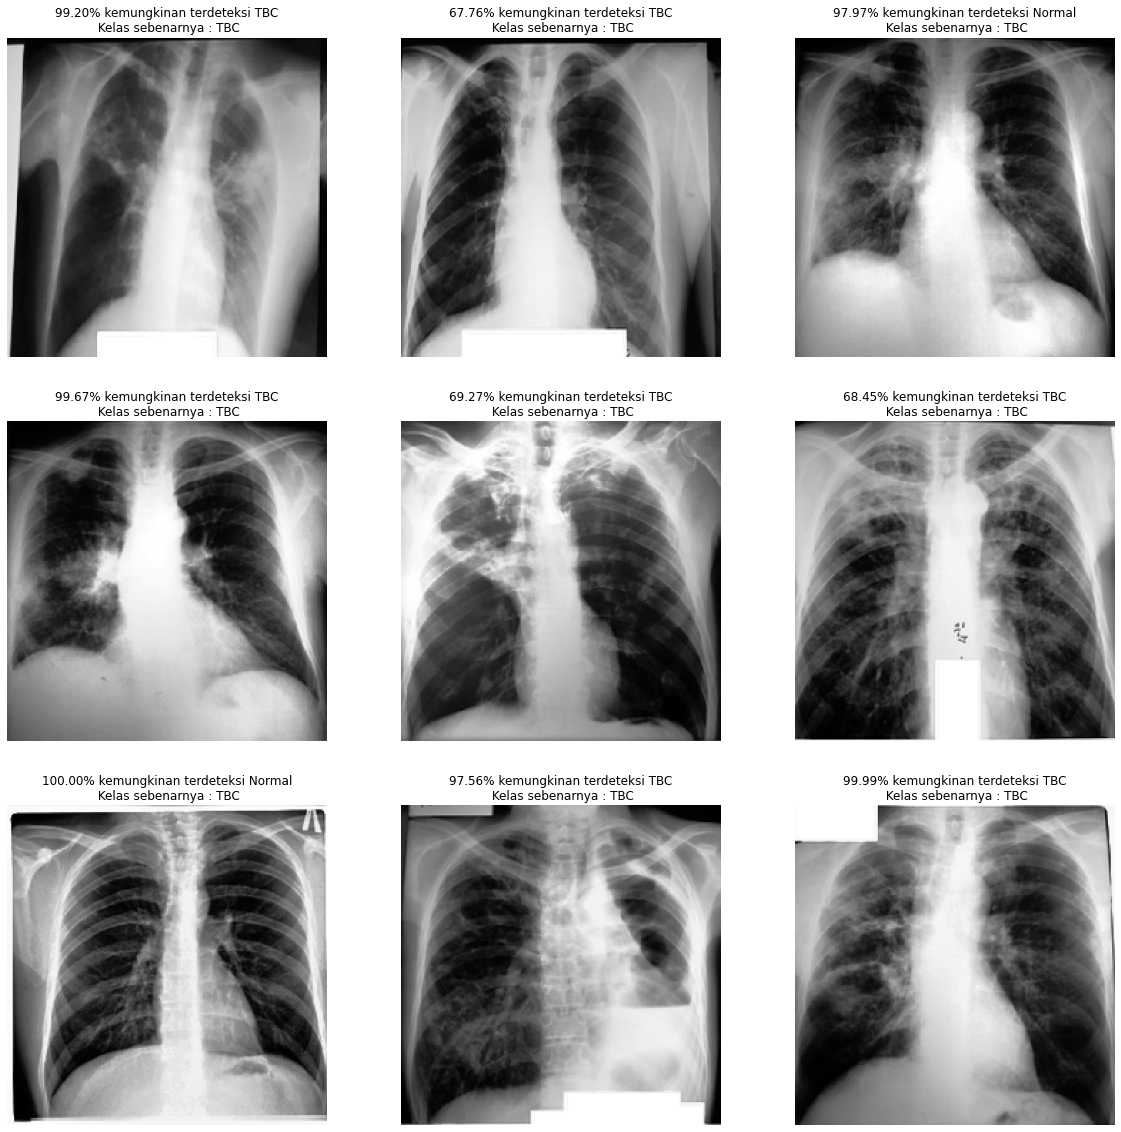

In [ ]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)
#this little code above extracts the images from test Data iterator without shuffling the sequence
# x contains image array and y has labels 
dic = {0:'Normal', 1:'TBC'}
plt.figure(figsize=(20,20))
for i in range(0+100, 9+100):
  plt.subplot(3, 3, (i-100)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} kemungkinan terdeteksi TBC'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} kemungkinan terdeteksi Normal'.format(1-preds[i][0]))
  plt.title(out+"\n Kelas sebenarnya : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [ ]:
# preprocessing gambar untuk testing
img = cv2.imread('/content/208613 (8).jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    
img_eqhist = cv2.equalizeHist(gray_img)
    
cv2.imwrite('/content/208613 (8).jpg', img_eqhist)

True

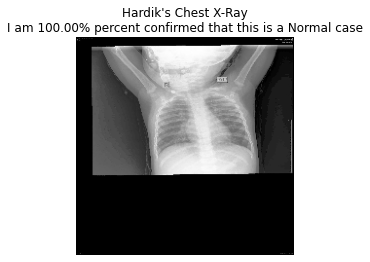

In [ ]:
# Testing 
hardik_path = '/content/208613 (8).jpg'
from tensorflow.keras.preprocessing import image
hardik_img = image.load_img(hardik_path, target_size=(224, 224),color_mode='rgb')
# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)
#predict
hardik_preds= model.predict(pp_hardik_img)
#print
plt.figure(figsize=(4,4))
plt.axis('off')
if hardik_preds>= 0.5: 
    out = ('I am {:.2%} percent confirmed that this is a Tubercolusis case'.format(hardik_preds[0][0]))
    
else: 
    out = ('I am {:.2%} percent confirmed that this is a Normal case'.format(1-hardik_preds[0][0]))
plt.title("Hardik's Chest X-Ray\n"+out)  
plt.imshow(np.squeeze(pp_hardik_img))
plt.show()

# Save Model

In [ ]:
!rm -rf /content/TB_Chest_Radiography_Database
# !rm -rf /content/output

In [ ]:
!zip -r /content/normal_data.zip /content/TB_Chest_Radiography_Database/Normal

In [ ]:
from google.colab import files
files.download("/content/normal_data.zip")

In [ ]:
from tensorflow.keras.models import load_model
model.save("model_86%.h5")